**MODELO DE CLASIFICACIÓN**

El objetivo de este modelo es analizar las variables que más influencian en la clasificación entre hombres y mujeres. Es decir, se estudiarán las variables más discriminantes a la hora de diferenciar los diferentes géneros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### importamos librería

#analisis
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

#modelado
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_tree

#resultados
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from matplotlib import rcParams
!pip install shap
import shap

## 1. Importar Datos

In [ ]:
#LAIA
#df_final = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/df_final')

In [ ]:
#Laura
#For Women
df_w21=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="w21")
df_w20=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="w20")
df_w19=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="w19")
df_w17=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="w17")
df_w15=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="w15")
df_w13=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="w13")

#laura
#For Men

df_m21=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="m21")
df_m20=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="m20")
df_m19=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="m19")
df_m17=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="m17")
df_m15=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="m15")
df_m13=pd.read_excel('/content/drive/MyDrive/TEAM/Capstone/Copia de index_data__index_indics.xlsx',sheet_name="m13")

ge_index21=pd.read_excel("/content/drive/MyDrive/master/capstone project/Còpia de Gender Equality Index.xlsx",sheet_name="2021")
ge_index20=pd.read_excel("/content/drive/MyDrive/master/capstone project/Còpia de Gender Equality Index.xlsx",sheet_name="2020")
ge_index19=pd.read_excel("/content/drive/MyDrive/master/capstone project/Còpia de Gender Equality Index.xlsx",sheet_name="2019")
ge_index17=pd.read_excel("/content/drive/MyDrive/master/capstone project/Còpia de Gender Equality Index.xlsx",sheet_name="2021")
ge_index15=pd.read_excel("/content/drive/MyDrive/master/capstone project/Còpia de Gender Equality Index.xlsx",sheet_name="2021")
ge_index13=pd.read_excel("/content/drive/MyDrive/master/capstone project/Còpia de Gender Equality Index.xlsx",sheet_name="2021")


In [ ]:
#valentina
'''df_w21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w21")
df_w20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w20")
df_w19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w19")
df_w17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w17")
df_w15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w15")
df_w13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w13")
df_m21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m21")
df_m20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m20")
df_m19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m19")
df_m17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m17")
df_m15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m15")
df_m13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m13")
ge_index21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Gender Equality Index.xlsx",sheet_name="2021")
ge_index20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Gender Equality Index.xlsx",sheet_name="2020")
ge_index19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Gender Equality Index.xlsx",sheet_name="2019")
ge_index17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Gender Equality Index.xlsx",sheet_name="2021")
ge_index15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Gender Equality Index.xlsx",sheet_name="2021")
ge_index13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Gender Equality Index.xlsx",sheet_name="2021")'''

'df_w21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w21")\ndf_w20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w20")\ndf_w19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w19")\ndf_w17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w17")\ndf_w15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w15")\ndf_w13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="w13")\ndf_m21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name="m21")\ndf_m20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx",sheet_name

In [ ]:
# IMPORTAR EL DOCUMENTO laia

#For Women
"""df_w21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w21")
df_w20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w20")
df_w19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w19")
df_w17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w17")
df_w15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w15")
df_w13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w13")


#For men laia
df_m21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m21")
df_m20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m20")
df_m19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m19")
df_m17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m17")
df_m15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m15")
df_m13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m13")

#indice de igualdad
ge_index21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Gender Equality Index.xlsx",sheet_name="2021")
ge_index20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Gender Equality Index.xlsx",sheet_name="2020")
ge_index19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Gender Equality Index.xlsx",sheet_name="2019")
ge_index17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Gender Equality Index.xlsx",sheet_name="2021")
ge_index15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Gender Equality Index.xlsx",sheet_name="2021")
ge_index13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Gender Equality Index.xlsx",sheet_name="2021")"""

'df_w21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w21")\ndf_w20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w20")\ndf_w19=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w19")\ndf_w17=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w17")\ndf_w15=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w15")\ndf_w13=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="w13")\n\n\n#For men laia\ndf_m21=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/Copia de index_data__index_indics.xlsx",sheet_name="m21")\ndf_m20=pd.read_excel("/content/drive/MyDrive/DATA SCIENCE/TEAM/

In [ ]:
df_w21['year']=2021
df_w20['year']=2020
df_w19['year']=2019
df_w17['year']=2017
df_w15['year']=2015
df_w13['year']=2013

In [ ]:
df_w18=pd.DataFrame(columns=df_w21.columns)
df_w16=pd.DataFrame(columns=df_w21.columns)
df_w14=pd.DataFrame(columns=df_w21.columns)

In [ ]:
name_column = df_w21.columns[1:]

In [ ]:
for i in name_column:
  df_w18[i]=(df_w19[i]+ df_w17[i])/2

In [ ]:
for i in name_column:
  df_w16[i]=(df_w17[i]+ df_w15[i])/2

In [ ]:
for i in name_column:
  df_w14[i]=(df_w15[i]+ df_w13[i])/2

In [ ]:
df_w18['year']=2018
df_w16['year']=2016
df_w14['year']=2014

df_w18['Country']=df_w21['Country']
df_w16['Country']=df_w21['Country']
df_w14['Country']=df_w21['Country']

In [ ]:
df2_woman = pd.concat([df_w21,df_w20,df_w19,df_w17,df_w15,df_w13,df_w18,df_w16,df_w14])

In [ ]:
df2_woman.head(2)

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,share_board_member_public_org,share_decision_making_body_olympic_org,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,40.0,13.0,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,27.0,12.0,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021


In [ ]:
df2_woman['Sex']='W'

In [ ]:
df2_woman.head(2)

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,share_decision_making_body_olympic_org,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,13.0,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,12.0,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W


In [ ]:
df2_woman.isnull().sum()

Country                                          0
fulltime_employement_rate                        0
duration_working_life                            0
employed_in_education_health_socialactivities    0
flexibility_at_work                              0
career_prospects                                 0
mean_monthly_earnings                            0
mean_equivalised_income                          0
risk_of_poverty                                  0
S20/S80_income                                   0
tertiary_education_graduates                     0
people_in_education                              0
tertiary_students_education_health_art_field     0
caring_kids_eldery_people_everyday               0
cooking_housework_everyday                       0
doing_sport_cultural_activities                  0
voluntary_activities                             0
share_ministers                                  0
share_members_parliament                         0
share_members_regional_assembli

In [ ]:
df_m21['year']=2021
df_m20['year']=2020
df_m19['year']=2019
df_m17['year']=2017
df_m15['year']=2015
df_m13['year']=2013

In [ ]:
df_m18=pd.DataFrame(columns=df_w21.columns)
df_m16_=pd.DataFrame(columns=df_w21.columns)
df_m14=pd.DataFrame(columns=df_w21.columns)

In [ ]:
for i in name_column:
  df_m18[i]=(df_m19[i]+ df_m17[i])/2

In [ ]:
for i in name_column:
  df_m16_[i]=(df_m15[i]+df_m17[i])/2

In [ ]:
for i in name_column:
  df_m14[i]=(df_m15[i]+ df_m13[i])/2

In [ ]:
df_m18['year']=2018
df_m16_['year']=2016
df_m14['year']=2014

df_m18['Country']=df_m21['Country']
df_m16_['Country']=df_m21['Country']
df_m14['Country']=df_m21['Country']

In [ ]:
df2_man = pd.concat([df_m21,df_m20,df_m19,df_m17,df_m15,df_m13,df_m14,df_m16_,df_m18])

In [ ]:
df2_man['Sex']='M'

In [ ]:
df2_man.head(1)

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,share_decision_making_body_olympic_org,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex
0,Austria,61.0,40.0,9.0,36.0,65.0,3018.0,27666.0,12.0,24.0,...,87.0,72.0,80.0,57.0,53.0,55.0,1.0,1.0,2021,M


In [ ]:
df2 = df2_woman.append(df2_man, ignore_index=True)
df2.head(2)

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,share_decision_making_body_olympic_org,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,13.0,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,12.0,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W


In [ ]:
ge_index21["year"]=2021
ge_index20["year"]=2020
ge_index19["year"]=2019
ge_index17["year"]=2017
ge_index15["year"]=2015
ge_index13["year"]=2013

In [ ]:
ge_index14=pd.DataFrame(columns=("Country","Score","year"))
ge_index16=pd.DataFrame(columns=("Country","Score","year"))
ge_index18=pd.DataFrame(columns=("Country","Score","year"))

In [ ]:
ge_index14['Country']=ge_index13['Country']
ge_index14['year']=2014
ge_index14['Score']=(ge_index13['Score']+ge_index15['Score'])/2
ge_index16['Country']=ge_index13['Country']
ge_index16['year']=2016
ge_index16['Score']=(ge_index17['Score']+ge_index15['Score'])/2
ge_index18['Country']=ge_index13['Country']
ge_index18['year']=2018
ge_index18['Score']=(ge_index17['Score']+ge_index19['Score'])/2

In [ ]:
ge_index=pd.concat([ge_index21,ge_index20,ge_index19,ge_index18, ge_index17, ge_index16, ge_index15,ge_index14,ge_index13])

In [ ]:
ge_index

,Country,Score,year
0,European Union,68.0,2021
1,Belgium,72.7,2021
2,Bulgaria,59.9,2021
3,Czechia,56.7,2021
4,Denmark,77.8,2021
...,...,...,...
23,Romania,54.5,2013
24,Slovenia,67.6,2013
25,Slovakia,56.0,2013
26,Finland,75.3,2013


In [ ]:
df_final=pd.merge(df2,ge_index,how="left")
df_final

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W,68.00
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W,72.70
2,Bulgaria,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,...,63.0,79.0,68.0,68.0,9.0,2.0,3.0,2021,W,59.90
3,Cyprus,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,...,77.0,84.0,63.0,81.0,33.0,2.0,5.0,2021,W,57.00
4,Czechia,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,...,61.0,82.0,63.0,73.0,30.0,3.0,3.0,2021,W,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Portugal,54.5,38.5,7.0,28.0,57.0,1670.0,12984.0,18.0,16.5,...,53.0,78.0,59.0,63.0,35.0,3.5,16.0,2018,M,61.05
500,Romania,59.0,36.0,3.0,20.0,67.0,1003.0,5732.0,22.0,13.5,...,75.5,72.0,59.5,36.0,16.0,7.0,8.0,2018,M,54.50
501,Sweden,65.5,42.5,12.0,47.0,68.0,3085.0,23088.5,14.5,24.5,...,80.0,80.5,73.5,61.0,56.0,5.5,5.0,2018,M,83.75
502,Slovenia,57.0,36.5,6.0,32.0,61.0,2021.0,16596.0,12.5,28.5,...,68.5,78.0,59.0,54.0,46.0,2.0,3.0,2018,M,67.95


In [ ]:
df_final.drop(df_final[df_final["Country"].str.contains('European Union')].index, inplace=True) 

In [ ]:
df_final.head()

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W,68.0
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W,72.7
2,Bulgaria,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,...,63.0,79.0,68.0,68.0,9.0,2.0,3.0,2021,W,59.9
3,Cyprus,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,...,77.0,84.0,63.0,81.0,33.0,2.0,5.0,2021,W,57.0
4,Czechia,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,...,61.0,82.0,63.0,73.0,30.0,3.0,3.0,2021,W,56.7


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 503
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        486 non-null    object 
 1   fulltime_employement_rate                      486 non-null    float64
 2   duration_working_life                          486 non-null    float64
 3   employed_in_education_health_socialactivities  486 non-null    float64
 4   flexibility_at_work                            486 non-null    float64
 5   career_prospects                               486 non-null    float64
 6   mean_monthly_earnings                          486 non-null    float64
 7   mean_equivalised_income                        486 non-null    float64
 8   risk_of_poverty                                486 non-null    float64
 9   S20/S80_income                                 486 non

Establecemos el país como índice para que no influya en la clasificación entre hombres y mujeres, y que sean el resto de variables las que lo determinen.

In [ ]:
df_final.set_index('Country',inplace = True)

In [ ]:
df_final.head()

,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,tertiary_education_graduates,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
Country,,,,,,,,,,,,,,,,,,,,,
Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,26.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W,68.0
Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,34.0,...,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W,72.7
Bulgaria,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,26.0,...,63.0,79.0,68.0,68.0,9.0,2.0,3.0,2021,W,59.9
Cyprus,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,39.0,...,77.0,84.0,63.0,81.0,33.0,2.0,5.0,2021,W,57.0
Czechia,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,20.0,...,61.0,82.0,63.0,73.0,30.0,3.0,3.0,2021,W,56.7


## 2. Análisis del Target

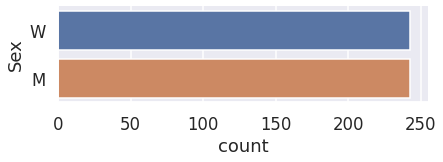

In [ ]:
ax = sns.catplot(y="Sex", kind="count", data=df_final, height=2.6, aspect=2.5, orient='h')

In [ ]:
target = 'Sex'
features = df_final.columns[df_final.columns!=target]

In [ ]:
le=LabelEncoder()

In [ ]:
df_final['Sex']=le.fit_transform(df_final['Sex'])

In [ ]:
# 1 = Woman
# 0 = Man

## 3. Correlaciones

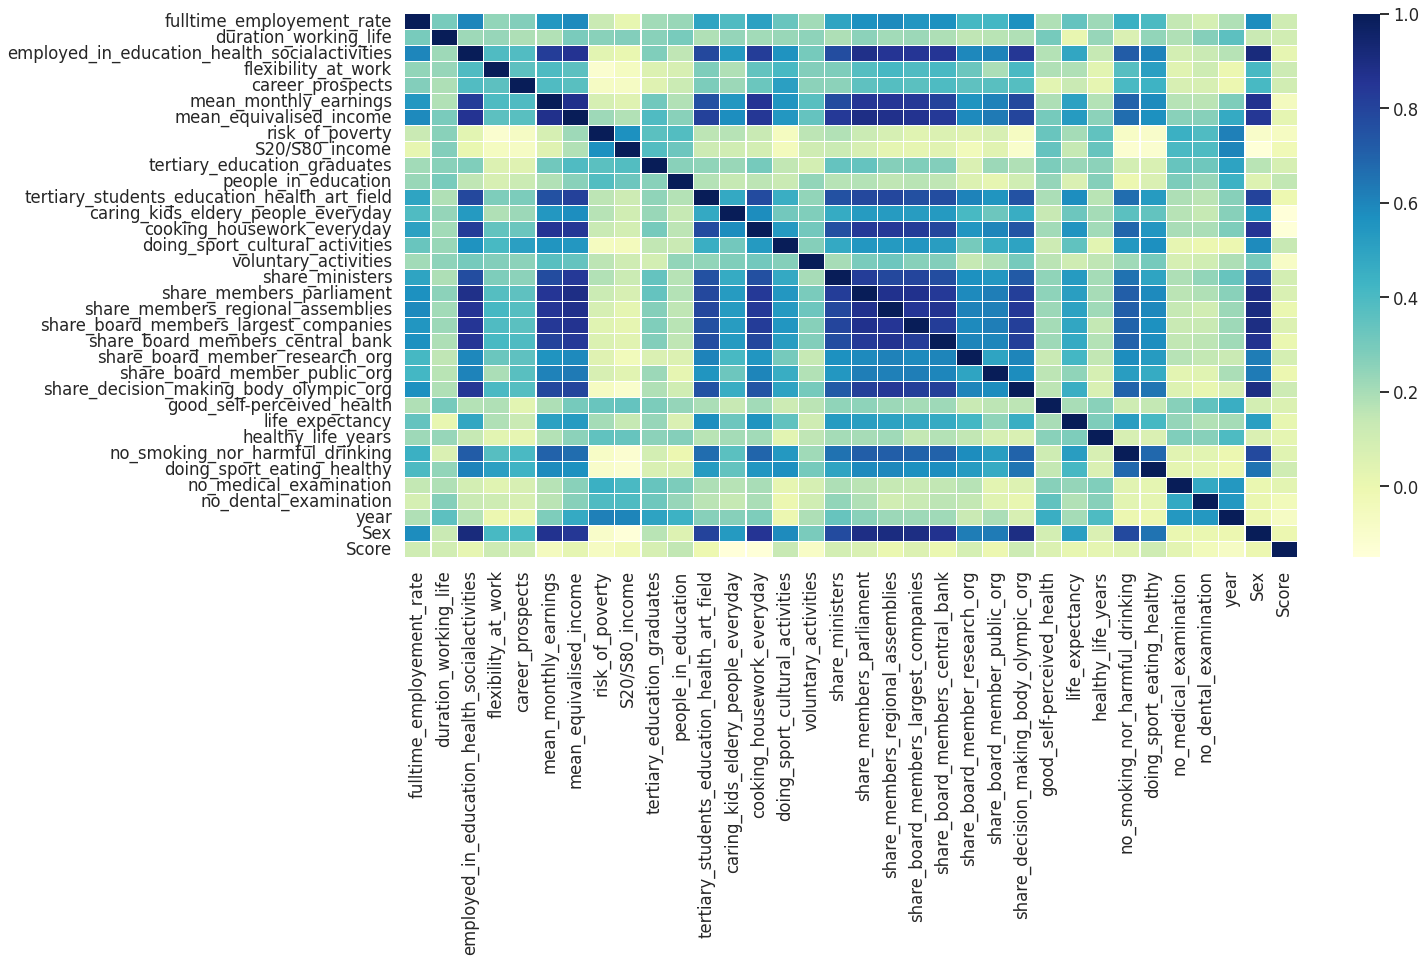

In [ ]:
plt.figure(figsize=(20, 10))

corr = df_final.apply(lambda x: pd.factorize(x)[0]).corr() 
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [ ]:
def correlation(dataset, threshold):
    col_corr = list()
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr':col_corr})
    return Y

In [ ]:
highly_corr = correlation(df_final, 0.75)
highly_corr.sort_values(by='corr', ascending = False)

,F1,F2,corr
12,share_members_regional_assemblies,share_members_parliament,0.967247
31,share_decision_making_body_olympic_org,share_board_members_largest_companies,0.965835
15,share_board_members_largest_companies,share_members_parliament,0.953952
29,share_decision_making_body_olympic_org,share_members_parliament,0.952945
11,share_members_regional_assemblies,share_ministers,0.951260
30,share_decision_making_body_olympic_org,share_members_regional_assemblies,0.947672
9,share_members_parliament,share_ministers,0.947487
3,tertiary_students_education_health_art_field,employed_in_education_health_socialactivities,0.942141
32,share_decision_making_body_olympic_org,share_board_members_central_bank,0.939442
16,share_board_members_largest_companies,share_members_regional_assemblies,0.937513


Graficamos algunas de estas variables correlacionadas:

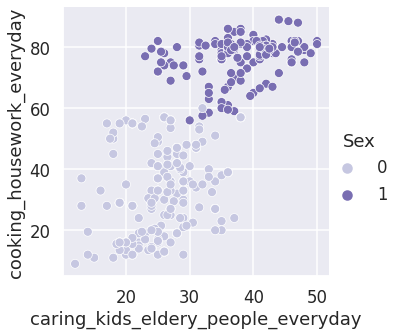

In [ ]:
sns.relplot(
    data = df_final,x = 'caring_kids_eldery_people_everyday', y = 'cooking_housework_everyday' , hue = 'Sex', palette='Purples')

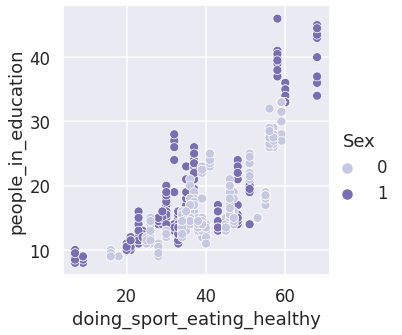

In [ ]:
sns.relplot(
    data = df_final,x = 'doing_sport_eating_healthy', y = 'people_in_education' , hue = 'Sex', palette='Purples')

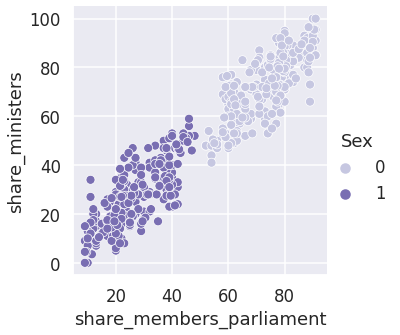

In [ ]:
sns.relplot(
    data = df_final,x = 'share_members_parliament', y = 'share_ministers' , hue = 'Sex', palette='Purples')

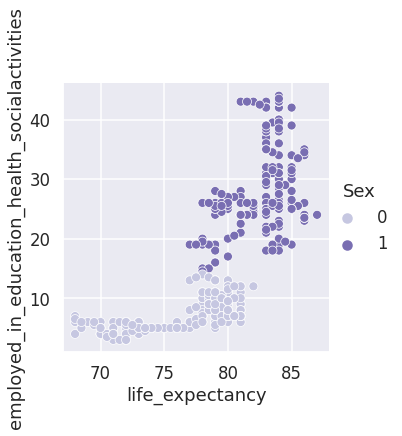

In [ ]:
sns.relplot(
    data = df_final,x = 'life_expectancy', y = 'employed_in_education_health_socialactivities' , hue = 'Sex', palette='Purples')

## 4. Split, Train and Test

In [ ]:
target='Sex'
features_df_final = df_final.columns[df_final.columns!=target]

y = df_final[target]
X = df_final[features_df_final]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [ ]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 340
Test set size: 146


In [ ]:
xgbc = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 500, objective='reg:squarederror')

xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

In [ ]:
accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [ ]:
model_names = ['XGBoost']
result_df_final = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df_final

,Accuracy,Recall,Roc_Auc,Precision,F1
XGBoost,1.0,1.0,1.0,1.0,1.0


Observamos que tenemos un modelo con un 100% en todas las métricas de evaluación. Con esto concluimos que existe una clara desigualdad entre hombres y mujeres que hace que sea muy fácil discriminar entre ellos. 

## Evaluación de los resultados

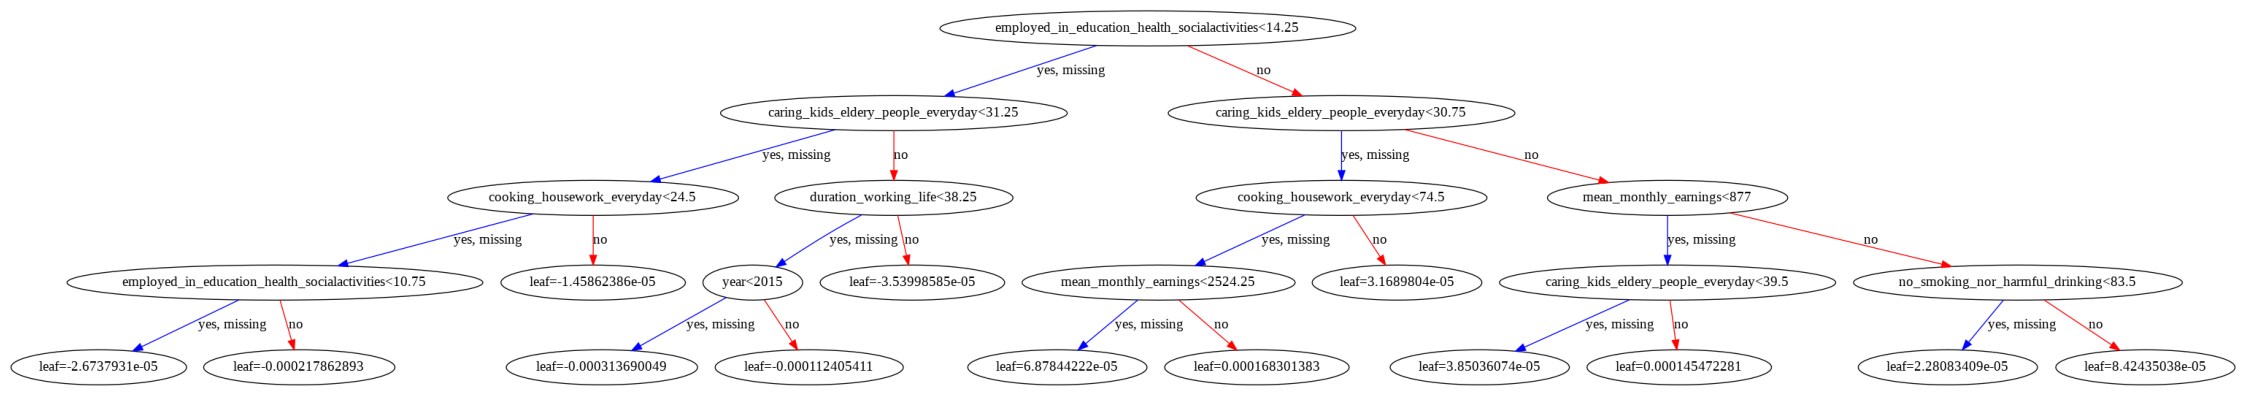

In [ ]:
plt.rcParams["figure.figsize"] =[40, 30]
plot_tree(xgbc, num_trees= 70)
plt.show()

### Feature importance

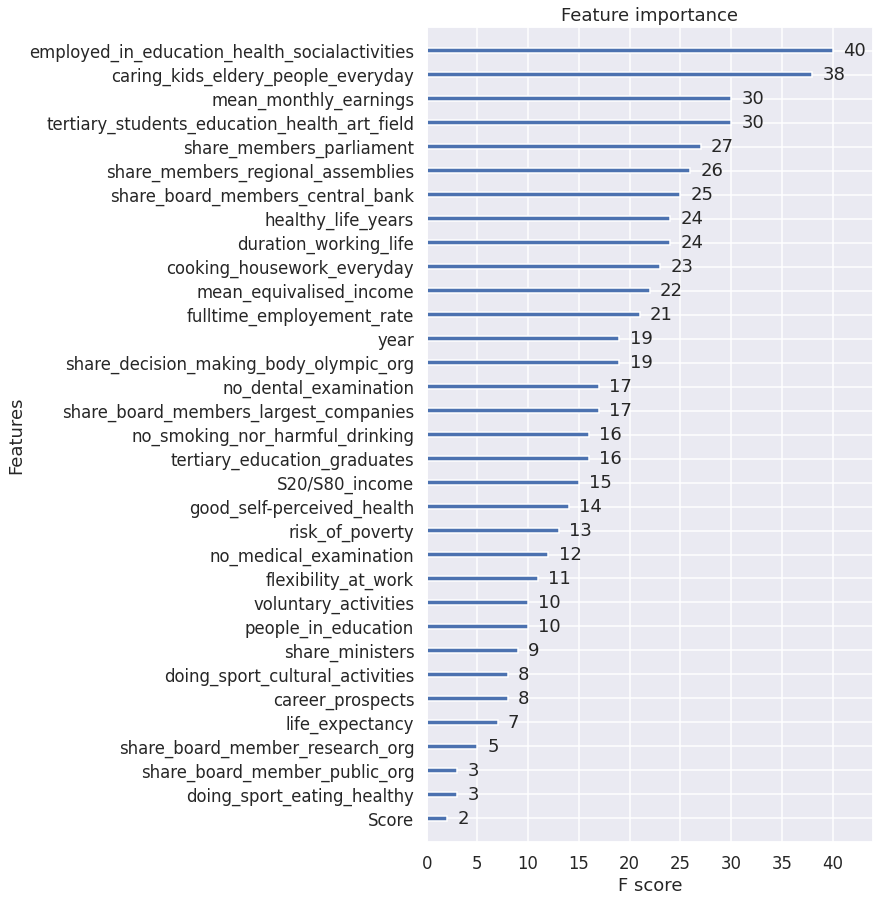

In [ ]:
rcParams['figure.figsize'] = 8,15
sns.set(context="talk")
xgb.plot_importance(xgbc, importance_type='weight')
plt.show()

En el gráfico superior, observamos las variables que tienen una mayor importancia en la discriminación entre mujeres y hombres. Vemos que encabeza la lista la variable que determina el porcentaje de mujeres u hombres que dedican una parte de su día a cuidar a niños, personas mayores o personas con alguna discapacidad, diariamente. En segundo lugar, encontramos el porcentaje de hombres o mujeres que se dedican al sector de la educación, la salud o trabajos sociales. Estas entonces serían unas variables que tienen unos porcentajes muy elevados entre mujeres y muy bajos entre los hombres. 

En cambio, en las dos últimas posiciones, encontramos el porcentaje de trabajadores que realizan deporte o actividades culturales varias veces a la semana y el porcentaje de la población que realiza actividades físicas y/o consume frutas y verduras. Concluimos entonces que entre estas variables no hay una clara diferencia entre los sexos y que, en consecuencia, no afectan mucho en la discriminación.

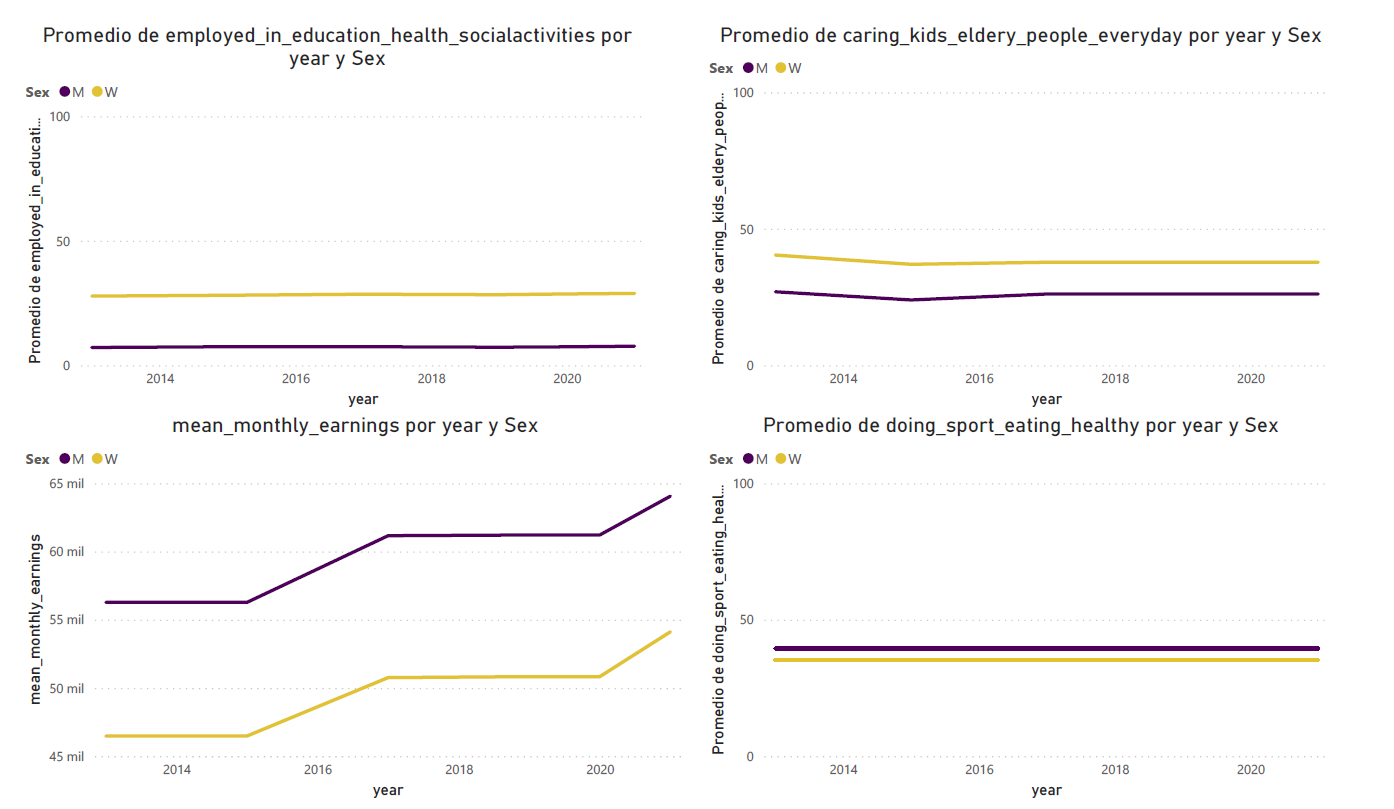

### SHAP Values

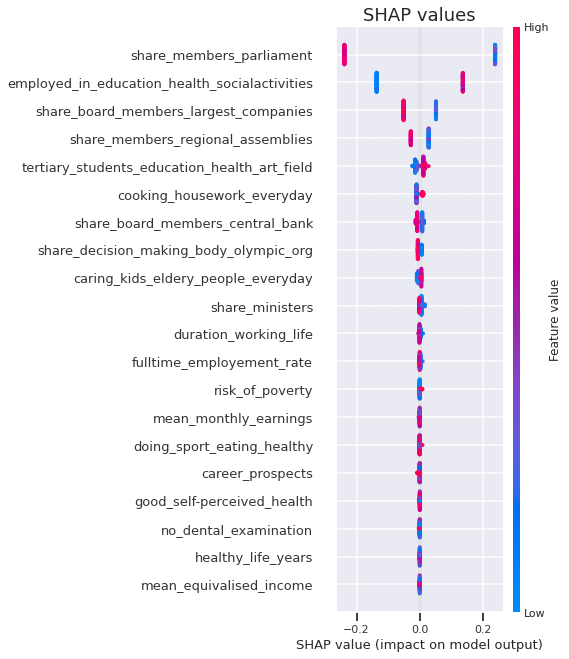

In [ ]:
explainer = shap.TreeExplainer(xgbc)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test)

Con este gráfico podemos ver la intensidad de cada variable en relación a los hombres y a las mujeres. Como podemos obervar, en primer lugar encontramos el % de mujeres u hombres como miembros del parlamento. Vemos que claramente las mujeres se encuentran a la derecha, con muy poca intensidad y los hombres en la posición contraria. 

En cambio, existen otras variables, en la parte inferior del gráfico, como la media de ingresos anuales, en la que concluimos que cuando se hace el análisis país por país, no existe tanta diferencia entre hombres y mujeres, ya que ambos se encuentran con la misma intensidad en el gráfico. 

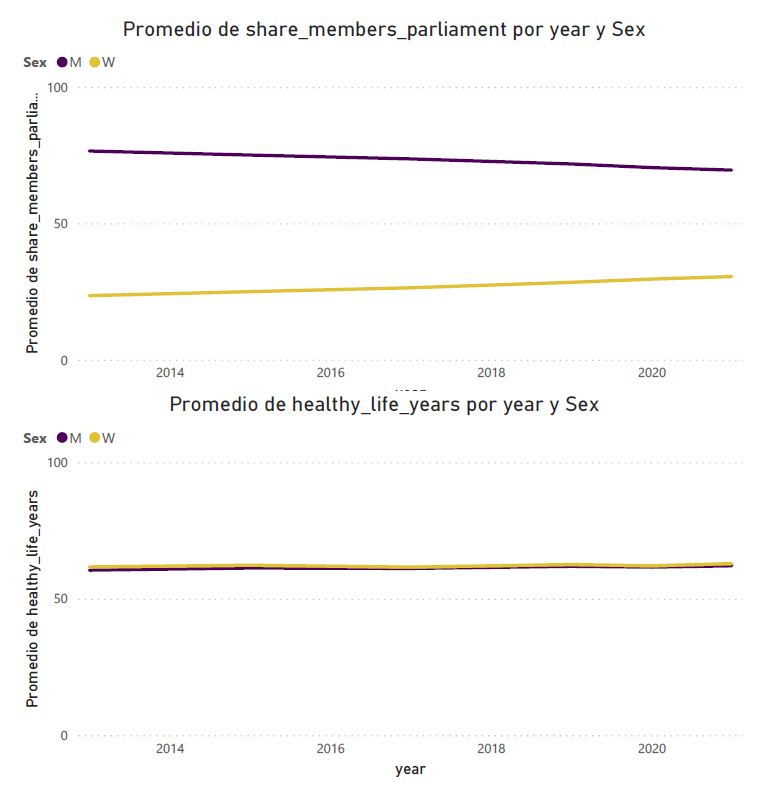